### 이미지 데이터 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
hedgehon_dir = '고슴도치/'
hamster_dir='햄스터/'
meerkat_dir = '미어캣/'

In [3]:
hedgehon_fnames = os.listdir(hedgehon_dir)
hamster_fnames = os.listdir(hamster_dir)
meerkat_fnames = os.listdir(meerkat_dir)

In [6]:
test_path = os.path.join(hedgehon_dir, hedgehon_fnames[50])
test_path

'고슴도치/144.png'

In [9]:
# 폴더 경로와 파일명, 이미지 사이즈를 매개변수로 받아서 이미지를 불러와 
# 배열로 만들어주는 사용자 정의 함수 생성하기

def load_image(folder_path, file_names, img_size_shape=(224,224)):
    images = []
    for i in file_names:
        # 카테고리 별 각 파일명들의 전체 경로를 설정
        path = os.path.join(folder_path, i)
        
        # 이미지를 경로에 맞게 불러와서 사이즈를 변경시키고 컬러이미지로 저장
        img = Image.open(path).resize(img_size_shape).convert('RGB')
        
        #이미지를 배열로 변환시킨 데이터를 바로 비어있는 리스트에 저장
        images.append(np.array(img))
    # 리스트 자체도 배열로 변환시켜 변환
    return np.array(images)

In [10]:
train_hedgehon = load_image(hedgehon_dir, hedgehon_fnames)
train_hamster = load_image(hamster_dir, hamster_fnames)
train_meerkat = load_image(meerkat_dir, meerkat_fnames)

In [11]:
print(train_hedgehon.shape)
print(train_hamster.shape)
print(train_meerkat.shape)

(400, 224, 224, 3)
(400, 224, 224, 3)
(400, 224, 224, 3)


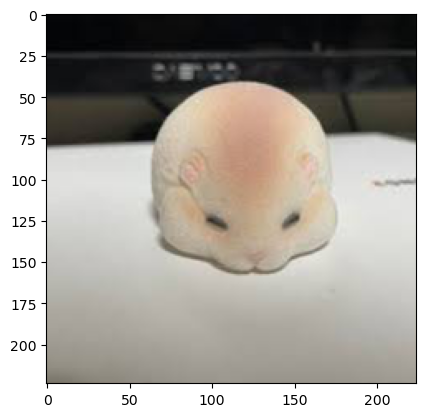

In [20]:
plt.imshow(train_hamster[200])

In [14]:
# 문제 데이터 생성
X = np.concatenate([train_hedgehon, train_hamster, train_meerkat])

In [16]:
# 정답 데이터 생성
# 고슴도치 : 0 , 햄스터 :1 , 미어캣 : 2
y = np.array([0]*400+[1]*400+[2]*400)

In [17]:
print(X.shape)
print(y.shape)

(1200, 224, 224, 3)
(1200,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 224, 224, 3), (240, 224, 224, 3), (960,), (240,))

### NPZ(Numpy Zip)
- 배열 데이터를 압축해서 저장한 파일 형식

In [21]:
np.savez_compressed('animals.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)